## Gather

In [2]:
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import time
import  re


In [3]:
Tweet_Arch = pd.read_csv('DataSet/twitter-archive-enhanced.csv')
Tweet_Arch.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [4]:

url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
IMG = requests.get(url)

with open('image-predictions.tsv', 'wb') as file_IMG:
    file_IMG.write(IMG.content)

Imges_pred = pd.read_csv('image-predictions.tsv', sep = '\t')
Imges_pred.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [5]:
#import tweepy

#consumer_key = ""
#consumer_secret = ""
#access_token = ""
#access_secret = ""

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(),wait_on_rate_limit=True)

In [6]:
 
#json_list = [] 
#execption = []
 
#for tweet_id in Tweet_Arch['tweet_id']:
#    try:
#        line = api.get_status(tweet_id, tweet_mode = 'extended') 
#        favorite_count = line['favorite_count']
#        retweet_count = line['retweet_count']    
#        created_at = line['created_at']   
#        json_list.append({'tweet_id': int(tweet_id),
#                        'favorite_count': int(favorite_count),
#                        'retweet_count': int(retweet_count), 
#                        'created_at': pd.to_datetime(created_at)}) 
#    except Exception as e:  
#        print(str(e) + '->' + str(tweet_id))

In [7]:
#df_tweets = pd.DataFrame(json_list, columns = ['tweet_id', 'favorite_count', 'retweet_count' , 'date_time'])
#df_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [8]:
df_tweets = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
df_tweets.head()

,tweet_id,favorite_count,retweet_count,date_time
0,892420643555336193,37986,8302,NaN
1,892177421306343426,32611,6130,NaN
2,891815181378084864,24556,4058,NaN
3,891689557279858688,41324,8442,NaN
4,891327558926688256,39502,9147,NaN


In [9]:
df_tweets.shape

(2340, 4)

## Assess Data 

### 1- Twitter Archive

In [10]:
Tweet_Arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
Tweet_Arch.shape

(2356, 17)

In [12]:
Tweet_Arch.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [13]:
Tweet_Arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1768,678389028614488064,NaN,NaN,2015-12-20 01:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She just learned that her final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678389028...,11,10,Bella,None,None,pupper,None
170,859074603037188101,NaN,NaN,2017-05-01 15:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an exotic dog. Good at ukulele. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859074603...,13,10,None,None,None,None,None
890,759566828574212096,NaN,NaN,2016-07-31 01:50:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This... is a Tyrannosaurus rex....,7.395441e+17,4.196984e+09,2016-06-05 19:47:03 +0000,https://twitter.com/dog_rates/status/739544079...,10,10,None,None,None,None,None
1487,693095443459342336,NaN,NaN,2016-01-29 15:36:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Milo. He doesn't understand your fancy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693095443...,10,10,Milo,None,None,pupper,None
156,861383897657036800,NaN,NaN,2017-05-08 00:54:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hobbes. He's never seen bubbles before...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/861383897...,13,10,Hobbes,None,None,None,None


In [14]:
Tweet_Arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
Tweet_Arch.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [16]:
Tweet_Arch['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [17]:
Tweet_Arch['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
an             7
Daisy          7
Bailey         7
Toby           7
Buddy          7
Rusty          6
Oscar          6
Dave           6
Bella          6
Stanley        6
Koda           6
Jax            6
Milo           6
Scout          6
Leo            6
Jack           6
Chester        5
            ... 
Ralphus        1
Tedders        1
Jett           1
Lolo           1
Sky            1
Rorie          1
Mack           1
Glenn          1
Brian          1
Deacon         1
Tupawc         1
Chuck          1
Nugget         1
Willy          1
Jessifer       1
Finnegus       1
Linus          1
Jo             1
Ralphie        1
Ole            1
Monkey         1
Cedrick        1
Monty          1
Lilli          1
Stuart         1
Mike           1
Mairi          1
Andru         

In [18]:
 
Tweet_Arch.loc[(Tweet_Arch['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [19]:
Tweet_Arch['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
Tweet_Arch['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [21]:
Tweet_Arch['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [22]:
Tweet_Arch['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [25]:
Tweet_Arch.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [26]:
Tweet_Arch.loc[(Tweet_Arch['doggo'] == 'doggo') & (Tweet_Arch['floofer'] == 'floofer')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [27]:
Tweet_Arch[Tweet_Arch.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


### 2- tweet image predictions

In [28]:
Imges_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
Imges_pred.shape

(2075, 12)

In [30]:
Imges_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [31]:
Imges_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1269,749774190421639168,https://pbs.twimg.com/media/Cme7pg2XEAATMnP.jpg,1,Pekinese,0.879012,True,Chihuahua,0.054855,True,Blenheim_spaniel,0.021041,True
1636,806242860592926720,https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg,2,Cardigan,0.593858,True,Shetland_sheepdog,0.130611,True,Pembroke,0.100842,True
835,694183373896572928,https://pbs.twimg.com/media/CaI8Fn0WAAIrFJN.jpg,1,teddy,0.441499,False,Pekinese,0.080870,True,Shih-Tzu,0.072099,True
1422,772114945936949249,https://pbs.twimg.com/media/Crcacf9WgAEcrMh.jpg,1,Chihuahua,0.803293,True,toy_terrier,0.052980,True,Italian_greyhound,0.037239,True
299,671486386088865792,https://pbs.twimg.com/media/CVGZTboUsAATohd.jpg,1,German_shepherd,0.827035,True,kelpie,0.087648,True,red_wolf,0.031218,False


In [32]:
img_dup = Imges_pred["jpg_url"]
Imges_pred[img_dup.isin(img_dup[img_dup.duplicated()])]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False


In [33]:
Imges_pred.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### 3- JSON tweets

In [34]:
df_tweets.head(5)

,tweet_id,favorite_count,retweet_count,date_time
0,892420643555336193,37986,8302,NaN
1,892177421306343426,32611,6130,NaN
2,891815181378084864,24556,4058,NaN
3,891689557279858688,41324,8442,NaN
4,891327558926688256,39502,9147,NaN


In [35]:
df_tweets.tail(5)

,tweet_id,favorite_count,retweet_count,date_time
2335,666049248165822465,106,42,NaN
2336,666044226329800704,293,139,NaN
2337,666033412701032449,123,43,NaN
2338,666029285002620928,126,47,NaN
2339,666020888022790149,2532,500,NaN


In [36]:
df_tweets.sample(5)

,tweet_id,favorite_count,retweet_count,date_time
1548,688179443353796608,2214,621,NaN
50,882268110199369728,44064,11337,NaN
2101,670421925039075328,1328,651,NaN
1360,701889187134500865,3710,1462,NaN
813,769212283578875904,5716,1853,NaN


In [37]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 4 columns):
tweet_id          2340 non-null int64
favorite_count    2340 non-null int64
retweet_count     2340 non-null int64
date_time         0 non-null float64
dtypes: float64(1), int64(3)
memory usage: 73.2 KB


In [38]:
df_tweets.dtypes

tweet_id            int64
favorite_count      int64
retweet_count       int64
date_time         float64
dtype: object

### Assessment Issues

### Quality
#####   1-Twitter Archive (Tweet_Arch data)
- comparing weet_Arch data with Imges_pred data 2356 compare to 2075 it same there is missing rows i belive this tweet without imeges.
- I notic in name column there is value like (a, an, the, such ,o,etc ..) is not realy names is seem like exracting issue
- in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp some of thim contain NAN value which is not usefull data.
- There is some rows have more than one dog.
- name varible have some values None it must be change to NAN.
- Missing data in column(expanded_urls)
- Erroneous datatypes tweet_id , timestamp,source,rating_denominator
 

#####   2- tweet image predictions (Imges_pred data) 
- some of jpg_url is duplicated 
- tweet_id convert to str 
- drop this columns p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'
#####   3- json API  (df_tweets data) 
- tweet_id convert to str 

### Tidiness
    
- Dog types column is seperated in three columns.
- we need to join and combined all datasets in one dataset 
 





## Clean

###### First we need to copy our data set to new data frame

In [79]:
Tweet_Arch_clean = Tweet_Arch.copy()
Imges_pred_clean = Imges_pred.copy()
df_tweets_clean = df_tweets.copy()

### Quality : Tweeter_Arch drop not needed column

##### Define
in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp some of thim contain NAN value which is not usefull data.

##### Code

In [80]:
unusefull_column = ['in_reply_to_status_id' , 'in_reply_to_user_id' ,'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
Tweet_Arch_clean = Tweet_Arch_clean.drop(unusefull_column, axis=1)

##### Test

In [81]:
Tweet_Arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [82]:
Tweet_Arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Quality : Tweeter_Arch  Name Issue (a, an, the, such ,o,etc ..) is not real names is seem like extracting issue 

##### Define
I notice in name column there is value like (a, an, the, such ,o,etc ..) is not really names is seem like extracting issue and name varible have some values None it must be change to NAN.

##### Code

In [83]:
import re
Tweet_Arch_clean['txt_splt'] = Tweet_Arch_clean['text'].str.split()
all = []

def check_relly_name(df):           
    if 'named' in df['text'] and re.match(r'[A-Z].*', df['txt_splt'][(df['txt_splt'].index('named') + 1)]): 
            all.append(df['txt_splt'][(df['txt_splt'].index('named') + 1)])  
    elif df['text'].startswith('Here is a ') and re.match(r'[A-Z].*', df['txt_splt'][3]):
            all.append(df['txt_splt'][3].strip('.').strip(','))         
    elif df['text'].startswith('Here we have ') and re.match(r'[A-Z].*', df['txt_splt'][3]):
            all.append(df['txt_splt'][3].strip('.').strip(',')) 
    elif df['text'].startswith('This is ') and re.match(r'[A-Z].*', df['txt_splt'][2]):
            all.append(df['txt_splt'][2].strip('.').strip(',')) 
    elif df['text'].startswith('Say hello to ') and re.match(r'[A-Z].*', df['txt_splt'][3]):
            all.append(df['txt_splt'][3].strip('.').strip(',')) 
    elif df['text'].startswith('Meet ') and re.match(r'[A-Z].*', df['txt_splt'][1]):
            all.append(df['txt_splt'][1].strip('.').strip(',')) 
    else:
        all.append('Not_Provide') 
        
Tweet_Arch_clean.apply(check_relly_name, axis=1)

Tweet_Arch_clean['Extracted_name'] = all

In [84]:
Tweet_Arch_clean['name'].replace('O', "O'Malley", inplace = True)

In [85]:
Tweet_Arch_clean.loc[Tweet_Arch_clean.name.str.islower(),'name']= np.nan

In [86]:
Tweet_Arch_clean['name'].replace('None', np.nan, inplace = True) 

In [87]:
Tweet_Arch_clean.loc[Tweet_Arch_clean['Extracted_name'] == 'Not_Provide', 'Extracted_name'] = None 

##### Test

In [88]:
Tweet_Arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1502 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
txt_splt              2356 non-null object
Extracted_name        1412 non-null object
dtypes: int64(3), object(11)
memory usage: 257.8+ KB


In [89]:
Tweet_Arch_clean.name.value_counts()

Charlie      12
Cooper       11
Oliver       11
Lucy         11
Penny        10
Tucker       10
Lola         10
Bo            9
Winston       9
Sadie         8
Toby          7
Bailey        7
Daisy         7
Buddy         7
Dave          6
Koda          6
Jax           6
Rusty         6
Leo           6
Scout         6
Jack          6
Oscar         6
Milo          6
Bella         6
Stanley       6
Alfie         5
Bentley       5
Phil          5
Finn          5
Sunny         5
             ..
Bruno         1
Bilbo         1
Hazel         1
Newt          1
Erik          1
Mike          1
Lilli         1
Obie          1
Chuck         1
Bloo          1
Craig         1
Kody          1
Rover         1
Jackie        1
Arlo          1
Franq         1
Deacon        1
Tupawc        1
Nugget        1
Monty         1
Willy         1
Jessifer      1
Finnegus      1
Linus         1
Jo            1
Brian         1
Ralphie       1
Monkey        1
Cedrick       1
Charleson     1
Name: name, Length: 931,

In [90]:
Tweet_Arch_clean.Extracted_name.value_counts()

Charlie      11
Lucy         11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Sadie         8
Lola          8
Winston       8
Daisy         7
Oscar         6
Bailey        6
Stanley       6
Toby          6
Bella         6
Bo            6
Jax           6
Koda          6
Scout         5
Bentley       5
Buddy         5
Milo          5
Louis         5
Chester       5
Rusty         5
Leo           5
Clark         4
Finn          4
Dave          4
Jeffrey       4
             ..
Ole           1
Wylie.        1
Glenn         1
Mack          1
Chuck         1
Tupawc        1
Deacon        1
Franq         1
Shiloh        1
Raphael       1
Marlee        1
Emmy          1
Mosby         1
Tuco          1
Eve           1
Evy           1
Chaz          1
Furzey        1
Henry         1
Ferg          1
Dook          1
Alejandro     1
Bloo          1
Fred-Rick     1
Craig         1
Kody          1
Rover         1
Jackie        1
Arlo          1
Charleson     1
Name: Extracted_name, Le

### Quality : Tweeter_Arch  Erroneous datatypes 

##### Define
Erroneous datatypes tweet_id, timestamp, source,rating_numerator

##### Code

In [91]:
Tweet_Arch_clean['tweet_id'] = Tweet_Arch_clean['tweet_id'].astype(str)
Tweet_Arch_clean['source'] = Tweet_Arch_clean['source'].astype('category')  
Tweet_Arch_clean['timestamp'] = pd.to_datetime(Tweet_Arch_clean['timestamp'])
Tweet_Arch_clean['rating_numerator'] = Tweet_Arch_clean['rating_numerator'].astype('float')  

##### Test

In [92]:
Tweet_Arch_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                      category
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
txt_splt                      object
Extracted_name                object
dtype: object

### Quality : Tweeter_Arch  Erroneous datatypes 

##### Define
Erroneous datatypes tweet_id, timestamp, source


##### Code

In [93]:
Tweet_Arch_clean['tweet_id'] = Tweet_Arch_clean['tweet_id'].astype(str)
Tweet_Arch_clean['source'] = Tweet_Arch_clean['source'].astype('category')  
Tweet_Arch_clean['timestamp'] = pd.to_datetime(Tweet_Arch_clean['timestamp'])

##### Test

In [94]:
Tweet_Arch_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                      category
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
txt_splt                      object
Extracted_name                object
dtype: object

### Qulity : drop unused columns for Imges_pred_clean 

##### Define
there some column is seem not used in our analysis so I am gona drop it.

##### Code

In [95]:
Imges_pred_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)

##### Test

In [96]:
Imges_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
dtypes: int64(2), object(1)
memory usage: 48.7+ KB


In [97]:
 Imges_pred_clean.shape

(2075, 3)

### Qulity :  Imges_pred_clean  drop duplicated images 

##### Define
there is some of jpg_url is duplicated need to remove it .

##### Code

In [98]:
 Imges_pred_clean.drop_duplicates(subset ="jpg_url",   keep = 'first', inplace = True)

##### Test

In [99]:
 Imges_pred_clean.shape

(2009, 3)

In [100]:
Imges_pred_clean[Imges_pred_clean['jpg_url'] == 'https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg']

,tweet_id,jpg_url,img_num
1405,769940425801170949,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1


### Qulity : df_tweets tweet_id datatype change

##### Define
we neeed to convert tweet_id of df_tweets to  str .

##### Code

In [101]:
df_tweets_clean['tweet_id'] = df_tweets_clean['tweet_id'].astype(str)

##### Test

In [102]:
df_tweets_clean.dtypes

tweet_id           object
favorite_count      int64
retweet_count       int64
date_time         float64
dtype: object

### Tidiness : Join Tweet_Arch_clean with Imges_pred_clean  some tweets without images


##### Define
we neeed to combined Tweet_Arch_clean with Imges_pred_clean some tweets without images but first we need convert tweet_id of Imges_pred_clean to str .

##### Code

In [103]:
Imges_pred_clean['tweet_id'] = Imges_pred_clean['tweet_id'].astype(str)

In [104]:
Tweet_Arch_clean = Tweet_Arch_clean.merge(Imges_pred_clean, on='tweet_id', how='inner')

##### Test

In [105]:
Imges_pred_clean.dtypes

tweet_id    object
jpg_url     object
img_num      int64
dtype: object

In [106]:
Tweet_Arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 16 columns):
tweet_id              2009 non-null object
timestamp             2009 non-null datetime64[ns]
source                2009 non-null category
text                  2009 non-null object
expanded_urls         2009 non-null object
rating_numerator      2009 non-null float64
rating_denominator    2009 non-null int64
name                  1350 non-null object
doggo                 2009 non-null object
floofer               2009 non-null object
pupper                2009 non-null object
puppo                 2009 non-null object
txt_splt              2009 non-null object
Extracted_name        1370 non-null object
jpg_url               2009 non-null object
img_num               2009 non-null int64
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(11)
memory usage: 253.3+ KB


### Tidiness : Make doges column as one column

##### Define
After we join all dataset we need to merged  dog columns as one column by create new variable

##### Code

In [108]:
Tweet_Arch_clean['dog_type'] = Tweet_Arch_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)
dog_type_columns = ['doggo', 'floofer', 'pupper', 'puppo']
Tweet_Arch_clean = Tweet_Arch_clean.drop(dog_type_columns, axis=1)

In [109]:
# Handle multiple dog type
Tweet_Arch_clean.loc[Tweet_Arch_clean.dog_type == 'doggopupper', 'dog_type'] = 'doggo,pupper'
Tweet_Arch_clean.loc[Tweet_Arch_clean.dog_type == 'doggopuppo', 'dog_type'] = 'doggo,puppo'
Tweet_Arch_clean.loc[Tweet_Arch_clean.dog_type == 'doggofloofer', 'dog_type'] = 'doggo,floofer'
# Handle missing values
Tweet_Arch_clean.loc[Tweet_Arch_clean.dog_type == '', 'dog_type'] = np.nan

##### Test

In [110]:
Tweet_Arch_clean['dog_type'].value_counts()

pupper     226
doggo       72
puppo       28
floofer      3
Name: dog_type, dtype: int64

In [69]:
Tweet_Arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,txt_splt,Extracted_name,jpg_url,img_num,dog_type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,"[This, is, Phineas., He's, a, mystical, boy., ...",Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,"[This, is, Tilly., She's, just, checking, pup,...",Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,"[This, is, Archie., He, is, a, rare, Norwegian...",Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,"[This, is, Darla., She, commenced, a, snooze, ...",Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,"[This, is, Franklin., He, would, like, you, to...",Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,NaN


In [111]:
Tweet_Arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 13 columns):
tweet_id              2009 non-null object
timestamp             2009 non-null datetime64[ns]
source                2009 non-null category
text                  2009 non-null object
expanded_urls         2009 non-null object
rating_numerator      2009 non-null float64
rating_denominator    2009 non-null int64
name                  1350 non-null object
txt_splt              2009 non-null object
Extracted_name        1370 non-null object
jpg_url               2009 non-null object
img_num               2009 non-null int64
dog_type              329 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 206.2+ KB


### Quality : Tweets without images

#### comparing weet_Arch data with mges_pred data it same there is missing rows

##### Define
Delete the rows of tweets that not have image because it may be retweet or not tweet for rating purpose

##### Code

In [112]:
Tweet_Arch_clean = Tweet_Arch_clean.dropna(subset=['expanded_urls'])

##### Test

In [113]:
Tweet_Arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,txt_splt,Extracted_name,jpg_url,img_num,dog_type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,"[This, is, Phineas., He's, a, mystical, boy., ...",Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,"[This, is, Tilly., She's, just, checking, pup,...",Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,"[This, is, Archie., He, is, a, rare, Norwegian...",Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,"[This, is, Darla., She, commenced, a, snooze, ...",Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,"[This, is, Franklin., He, would, like, you, to...",Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,NaN


In [114]:
sum(Tweet_Arch_clean['expanded_urls'].isnull())

0

In [115]:
Tweet_Arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 13 columns):
tweet_id              2009 non-null object
timestamp             2009 non-null datetime64[ns]
source                2009 non-null category
text                  2009 non-null object
expanded_urls         2009 non-null object
rating_numerator      2009 non-null float64
rating_denominator    2009 non-null int64
name                  1350 non-null object
txt_splt              2009 non-null object
Extracted_name        1370 non-null object
jpg_url               2009 non-null object
img_num               2009 non-null int64
dog_type              329 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 206.2+ KB


In [116]:
Tweet_Arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 13 columns):
tweet_id              2009 non-null object
timestamp             2009 non-null datetime64[ns]
source                2009 non-null category
text                  2009 non-null object
expanded_urls         2009 non-null object
rating_numerator      2009 non-null float64
rating_denominator    2009 non-null int64
name                  1350 non-null object
txt_splt              2009 non-null object
Extracted_name        1370 non-null object
jpg_url               2009 non-null object
img_num               2009 non-null int64
dog_type              329 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 206.2+ KB


In [117]:
Tweet_Arch_clean.shape

(2009, 13)

#### Qulity : Name varible have some values None it must be change to NAN.

##### Define
 Name varible have some values None it must be change to NAN so we want to repace them to NAN

##### Code

In [118]:
Tweet_Arch_clean['name'] = Tweet_Arch_clean['name'].replace('None', np.NaN)
Tweet_Arch_clean['Extracted_name'] = Tweet_Arch_clean['name'].replace('None', np.NaN)
Tweet_Arch_clean.loc[Tweet_Arch_clean['dog_type'] == 'None', 'dog_type'] = None

##### Test

In [119]:
Tweet_Arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,txt_splt,Extracted_name,jpg_url,img_num,dog_type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,"[This, is, Phineas., He's, a, mystical, boy., ...",Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,"[This, is, Tilly., She's, just, checking, pup,...",Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,"[This, is, Archie., He, is, a, rare, Norwegian...",Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,"[This, is, Darla., She, commenced, a, snooze, ...",Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,"[This, is, Franklin., He, would, like, you, to...",Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,NaN


### Tidiness : Join Tweet_Arch_clean with df_tweets_clean 


##### Define
Join Tweet_Arch_clean with df_tweets_clean  to store it in one data set and do some analysis 

##### Code

In [120]:
Tweet_Arch_clean = pd.merge(left=Tweet_Arch_clean, right=df_tweets_clean, left_on='tweet_id', right_on='tweet_id', how='inner')


##### Test

In [121]:
Tweet_Arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 0 to 2005
Data columns (total 16 columns):
tweet_id              2006 non-null object
timestamp             2006 non-null datetime64[ns]
source                2006 non-null category
text                  2006 non-null object
expanded_urls         2006 non-null object
rating_numerator      2006 non-null float64
rating_denominator    2006 non-null int64
name                  1348 non-null object
txt_splt              2006 non-null object
Extracted_name        1348 non-null object
jpg_url               2006 non-null object
img_num               2006 non-null int64
dog_type              329 non-null object
favorite_count        2006 non-null int64
retweet_count         2006 non-null int64
date_time             0 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(4), object(8)
memory usage: 252.9+ KB


### Save DataSet As csv file

In [122]:
Tweet_Arch_clean.to_csv('twitter_archive_master.csv')

# Analyzing, and Visualizing Data 

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 


In [124]:
df=pd.read_csv('twitter_archive_master.csv')

In [125]:
df.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,txt_splt,Extracted_name,jpg_url,img_num,dog_type,favorite_count,retweet_count,date_time
0,0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,"['This', 'is', 'Phineas.', ""He's"", 'a', 'mysti...",Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,37986,8302,NaN
1,1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,"['This', 'is', 'Tilly.', ""She's"", 'just', 'che...",Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,NaN,32611,6130,NaN
2,2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,"['This', 'is', 'Archie.', 'He', 'is', 'a', 'ra...",Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,NaN,24556,4058,NaN
3,3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,"['This', 'is', 'Darla.', 'She', 'commenced', '...",Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,41324,8442,NaN
4,4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,"['This', 'is', 'Franklin.', 'He', 'would', 'li...",Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,NaN,39502,9147,NaN


In [126]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [127]:
df.dtypes

Unnamed: 0                     int64
tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator             int64
name                          object
txt_splt                      object
Extracted_name                object
jpg_url                       object
img_num                        int64
dog_type                      object
favorite_count                 int64
retweet_count                  int64
date_time                    float64
dtype: object

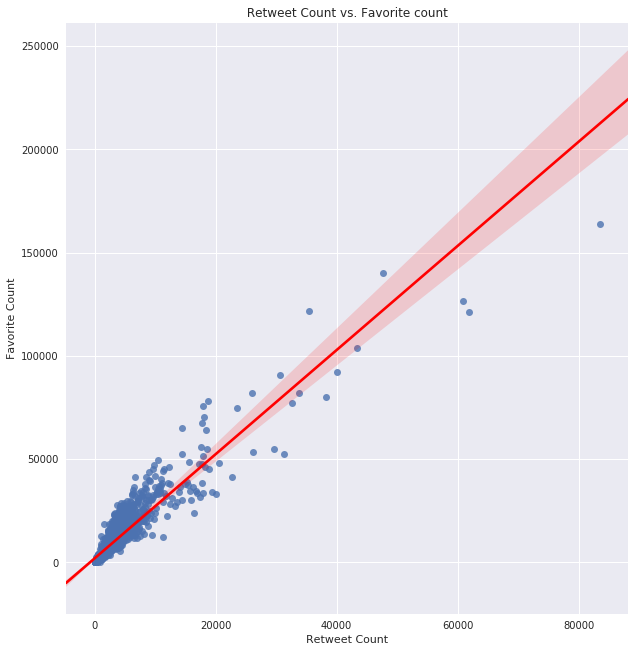

In [128]:
sns.set(color_codes=True)
sns.lmplot(x="retweet_count",y="favorite_count", data=df, size = 9, line_kws={'color': 'red'})
plt.title(' Retweet Count vs. Favorite count ')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');
plt.savefig('Retweet Count vs. Favorite count.png')


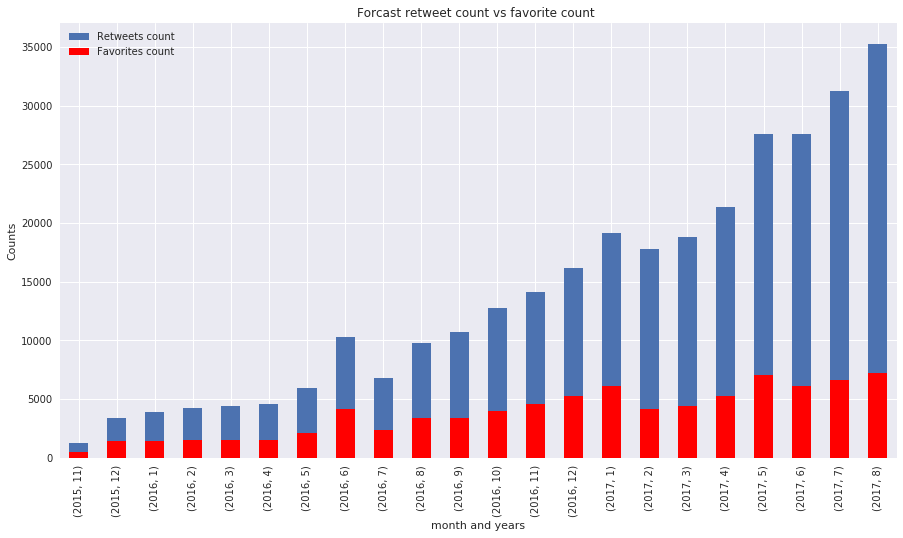

In [129]:
fig = plt.figure(figsize=(15,8))
df['favorite_count'].groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('bar').set_ylim(0, )
df['retweet_count'].groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('bar',color='red')
plt.legend(('Retweets count', 'Favorites count')) 
plt.title('Forcast retweet count vs favorite count ')
plt.ylabel('Counts')
plt.xlabel('month and years') 
plt.savefig('Forcast retweet count vs favorite count.png')


In [130]:
df.favorite_count.corr(df.retweet_count)

0.92963445620409624

In [131]:
df['favorite_count'].describe()

count      2006.000000
mean       8653.981057
std       12758.205037
min           0.000000
25%        1810.250000
50%        3872.500000
75%       10803.000000
max      164005.000000
Name: favorite_count, dtype: float64

In [132]:
df['retweet_count'].describe()

count     2006.000000
mean      2628.247258
std       4704.294179
min         11.000000
25%        580.250000
50%       1261.000000
75%       2994.000000
max      83455.000000
Name: retweet_count, dtype: float64

In [133]:
#top 5 popular Name
df['Extracted_name'].value_counts().head(5)


Oliver     10
Charlie    10
Cooper     10
Lucy       10
Penny       9
Name: Extracted_name, dtype: int64

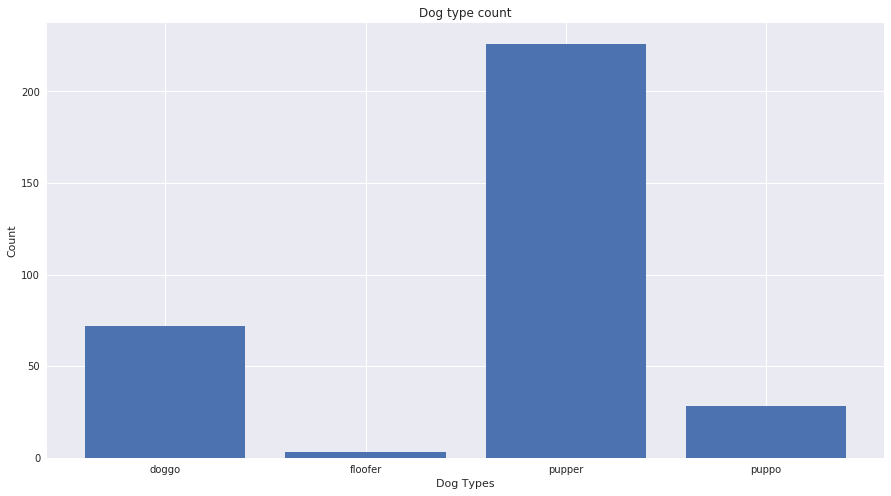

In [134]:
 plt.subplots(figsize=(15, 8))
plt.bar([1, 2, 3, 4], df.groupby('dog_type')['tweet_id'].count(), tick_label=['doggo', 'floofer', 'pupper', 'puppo'])
plt.title('Dog type count')
plt.xlabel('Dog Types')
plt.ylabel('Count');
plt.savefig('Dog_Types.png')


In [135]:
df.groupby('dog_type')['tweet_id'].count()

dog_type
doggo       72
floofer      3
pupper     226
puppo       28
Name: tweet_id, dtype: int64

In [136]:
df.dtypes

Unnamed: 0                     int64
tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator             int64
name                          object
txt_splt                      object
Extracted_name                object
jpg_url                       object
img_num                        int64
dog_type                      object
favorite_count                 int64
retweet_count                  int64
date_time                    float64
dtype: object

In [137]:
pd.set_option('max_colwidth', 800)
index=df['favorite_count'].nlargest(5).index 
heigh_faviort_dog = df[['tweet_id','name','timestamp','favorite_count','dog_type','jpg_url','Extracted_name']].iloc[index]
heigh_faviort_dog



,tweet_id,name,timestamp,favorite_count,dog_type,jpg_url,Extracted_name
785,744234799360020481,NaN,2016-06-18 18:26:18,164005,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,NaN
317,822872901745569793,NaN,2017-01-21 18:26:02,140166,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,NaN
408,807106840509214720,Stephan,2016-12-09 06:17:20,126822,NaN,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,Stephan
110,866450705531457537,Jamesy,2017-05-22 00:28:40,121776,pupper,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,Jamesy
820,739238157791694849,NaN,2016-06-04 23:31:25,121151,doggo,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg,NaN


<img src="https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg" height="300" width="300">

<img src="https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg" height="300" width="300">

<img src="https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg" height="300" width="300">

<img src="https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg" height="300" width="300">

<img src="https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg" height="300" width="300">